In [146]:
!pip install researchpy

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from statistics import mean, stdev

sns.set()
plt.set_cmap('tab10')

<Figure size 432x288 with 0 Axes>

In [148]:
sklearn_results = pd.read_csv('./drive/MyDrive/compsci/sklearn_results.csv')
cnn_results = pd.read_csv('./drive/MyDrive/compsci/cnn_results.csv')
cnn_results = cnn_results.transpose()
lstm_results = pd.read_csv('./drive/MyDrive/compsci/lstm_results.csv')
lstm_results = lstm_results.transpose()

sklearn_cv_results = pd.read_csv('./drive/MyDrive/compsci/sklearn_cv_results.csv')
keras_cv_results = pd.read_csv('./drive/MyDrive/compsci/keras_cv_results.csv')

In [149]:
sklearn_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']
cnn_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']
lstm_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']

sklearn_cv_results.columns = ['Model','Acc_Mean','Acc_Std','Pre_Mean','Pre_Std','Rec_Mean','Rec_Std','F1_Mean','F1_Std']
keras_cv_results.columns = ['Model','Acc_Mean','Acc_Std','Pre_Mean','Pre_Std','Rec_Mean','Rec_Std','F1_Mean','F1_Std']

In [150]:
frames = [sklearn_results,cnn_results,lstm_results]
all_results = pd.concat(frames, ignore_index=True)
all_results = all_results.drop(columns=['Conf Matrice'])
print(all_results)

cv_frames = [sklearn_cv_results,keras_cv_results]
all_cv_results = pd.concat(cv_frames, ignore_index=True)
print(all_cv_results)

   Model Accuracy Precision Recall F1score
0    GBC    0.908     0.953  0.908   0.923
1    ADA    0.277     0.807  0.277    0.35
2    RFC    0.903     0.949  0.903   0.919
3     NB    0.409     0.842  0.409   0.489
4  NNMLP    0.945     0.967  0.945   0.952
5    SVC    0.941     0.969  0.941   0.951
6    CNN    0.954     0.972  0.954    0.96
7   LSTM    0.926     0.965  0.926    0.94
   Model  Acc_Mean  Acc_Std  Pre_Mean  ...  Rec_Mean  Rec_Std  F1_Mean  F1_Std
0    ADA     0.498    0.231     0.356  ...     0.422    0.053    0.309   0.045
1    RFC     0.911    0.005     0.690  ...     0.918    0.002    0.757   0.008
2     NB     0.397    0.005     0.368  ...     0.600    0.005    0.347   0.002
3  NNMLP     0.944    0.007     0.769  ...     0.949    0.007    0.828   0.013
4    SVC     0.947    0.004     0.775  ...     0.954    0.005    0.827   0.008
5   LSTM     0.945    0.010     0.781  ...     0.954    0.006    0.837   0.022
6    CNN     0.949    0.014     0.791  ...     0.957    0.00

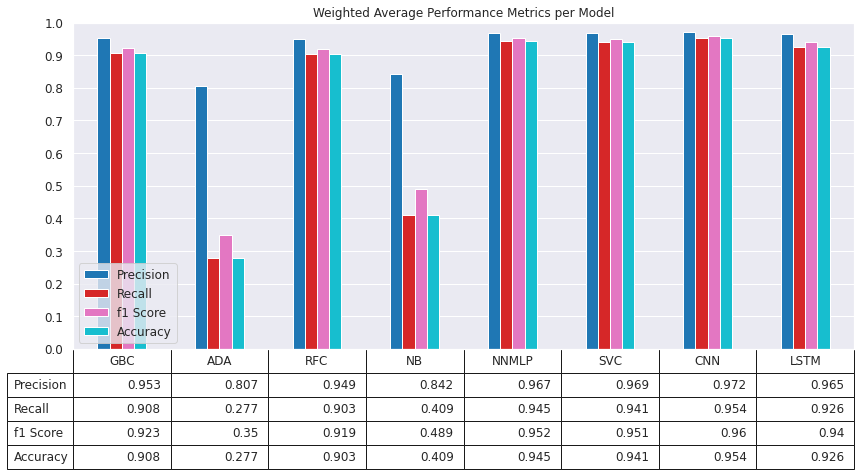

In [151]:
accuracy =  round(all_results['Accuracy'].astype(float),3).to_numpy()
precision = round(all_results['Precision'].astype(float),3).to_numpy()
recall =    round(all_results['Recall'].astype(float),3).to_numpy()
f1_score =  round(all_results['F1score'].astype(float),3).to_numpy()
index = all_results['Model']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df_res = pd.DataFrame({'Precision':precision,
                   'Recall':recall,
                   'f1 Score':f1_score,
                   'Accuracy':accuracy
                  },
                  index=index)
ax = df_res.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            table=True,
            title=('Weighted Average Performance Metrics per Model'),
            colormap='tab10')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],["Precision", "Recall", "f1 Score", 'Accuracy'], loc=3, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

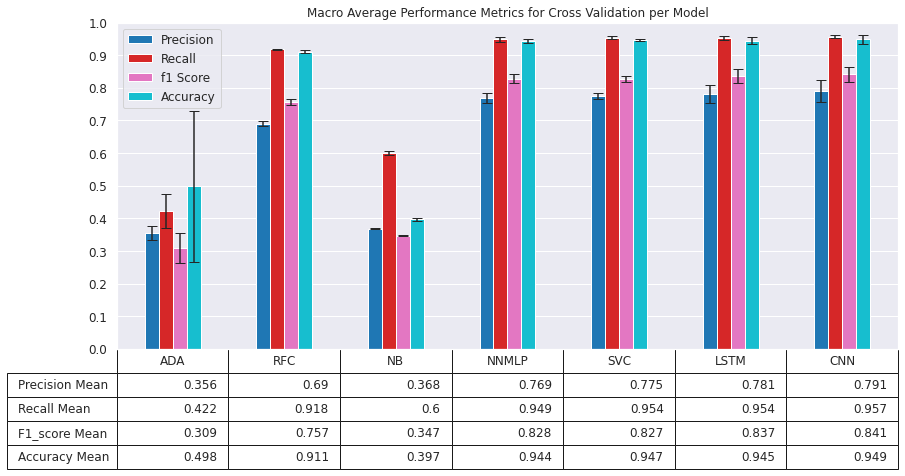

In [152]:
accuracyM =  round(all_cv_results['Acc_Mean'].astype(float),3).to_numpy()
accuracyS =  round(all_cv_results['Acc_Std'].astype(float),3).to_numpy()

precisionM = round(all_cv_results['Pre_Mean'].astype(float),3).to_numpy()
precisionS = round(all_cv_results['Pre_Std'].astype(float),3).to_numpy()

recallM =    round(all_cv_results['Rec_Mean'].astype(float),3).to_numpy()
recallS =    round(all_cv_results['Rec_Std'].astype(float),3).to_numpy()

f1_scoreM =  round(all_cv_results['F1_Mean'].astype(float),3).to_numpy()
f1_scoreS =  round(all_cv_results['F1_Std'].astype(float),3).to_numpy()

index = all_cv_results['Model']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df_cv = pd.DataFrame({'Precision Mean':precisionM,
                       'Recall Mean':recallM,
                       'F1_score Mean':f1_scoreM,
                       'Accuracy Mean':accuracyM,
                      # 'Precision Std':precisionS,
                      # 'Recall Std':recallS,                   
                      # 'F1_score Std':f1_scoreS,                   
                      # 'Accuracy Std':accuracyS
                       },index=index)

error = [precisionS,recallS,f1_scoreS,accuracyS]

ax = df_cv.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            yerr=error,
            capsize=5,
            table=True,
            title=('Macro Average Performance Metrics for Cross Validation per Model'),
            colormap='tab10')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],["Precision", "Recall", "f1 Score", 'Accuracy'], loc=2, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

In [153]:
import researchpy as rp
rp.summary_cont(df_cv)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Precision Mean,7.0,0.6471,0.1976,0.0747,0.4644,0.8299
1,Recall Mean,7.0,0.8220,0.2190,0.0828,0.6195,1.0245
2,F1_score Mean,7.0,0.6780,0.2410,0.0911,0.4551,0.9009
3,Accuracy Mean,7.0,0.7987,0.2420,0.0915,0.5749,1.0226


In [154]:
stack_df = df_cv.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'models',
                                    'level_1': 'metric',
                                    0:'score'},)
display(stack_df)

,Model,metric,score
0,ADA,Precision Mean,0.356
1,ADA,Recall Mean,0.422
2,ADA,F1_score Mean,0.309
3,ADA,Accuracy Mean,0.498
4,RFC,Precision Mean,0.690
5,RFC,Recall Mean,0.918
6,RFC,F1_score Mean,0.757
7,RFC,Accuracy Mean,0.911
8,NB,Precision Mean,0.368
9,NB,Recall Mean,0.600


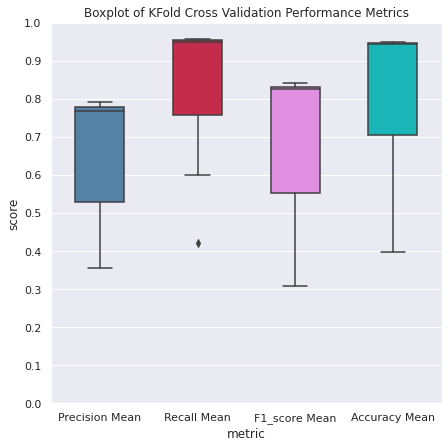

In [155]:
plt.figure(figsize=(7,7))
mypal=('#4682B4','#DC143C','#EE82EE','#00CED1')
ax = sns.boxplot(y=stack_df["score"], x=stack_df["metric"],width=0.5, palette=mypal)
ax.set_title('Boxplot of KFold Cross Validation Performance Metrics')
ax.set_ylim(0.0,1.0)
ax.set_yticks(ticks=ticks,minor=False)

In [156]:
import numpy as np
import scipy.stats as stats
# to check
# Confidence interval
confidence_level = 0.95
# If juste samples (not mean) the dof is 
mean_list, std_list, ci_list = [], [], []
for col_name  in df_cv:
    col_values = df_cv[col_name].values
    sample_size = len(col_values)
    degrees_freedom = sample_size - 1
    sample_mean = np.mean(col_values)
    # Standard error of the mean (SEM) = sigma / sqrt(n)
    sample_standard_error = stats.sem(col_values)
    print('sample_standard_error s^2=', sample_standard_error,
         'or s/np.sqrt(n_t)', np.std(col_values)/np.sqrt(sample_size),  np.std(col_values))
    confidence_interval = stats.t.interval(alpha=confidence_level,
                                           df=degrees_freedom,
                                           loc=sample_mean,
                                           scale=sample_standard_error)
    std_list.append(sample_standard_error)
    ci_list.append(confidence_interval)
    mean_list.append(sample_mean)
    
CI_df = pd.DataFrame([df_cv.columns.values, mean_list, std_list,  ci_list]).transpose()
CI_df.columns = ['metric',
                 'mean',
                 'std error',
                 'CI']
CI_df.loc[:,'CI'] =  CI_df.loc[:,'CI'].map(lambda x: (x[0].round(2), x[1].round(2)))
CI_df = CI_df.sort_values(by=['mean'])
display(CI_df)

sample_standard_error s^2= 0.07469475297803038 or s/np.sqrt(n_t) 0.06915390365460618 0.1829640312594087
sample_standard_error s^2= 0.08276501446292157 or s/np.sqrt(n_t) 0.07662551394773871 0.2027320539882278
sample_standard_error s^2= 0.09109309732878984 or s/np.sqrt(n_t) 0.08433582045753095 0.22313160754522043
sample_standard_error s^2= 0.09148164382247721 or s/np.sqrt(n_t) 0.08469554461108288 0.22408334819610204


,metric,mean,std error,CI
0,Precision Mean,0.647143,0.0746948,"(0.46, 0.83)"
2,F1_score Mean,0.678,0.0910931,"(0.46, 0.9)"
3,Accuracy Mean,0.798714,0.0914816,"(0.57, 1.02)"
1,Recall Mean,0.822,0.082765,"(0.62, 1.02)"


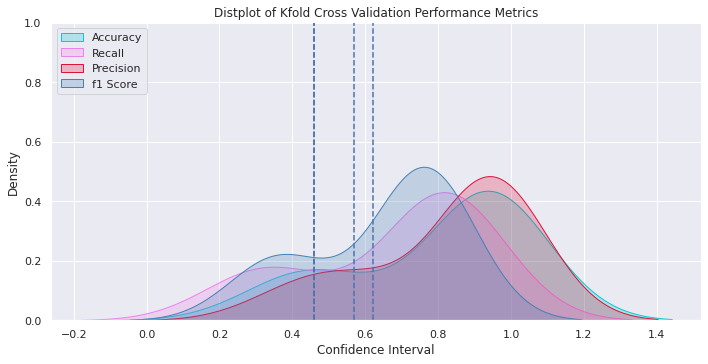

In [157]:
mypal1=('#4682B4','#DC143C','#EE82EE','#00CED1')
graph = sns.displot(stack_df, x='score', hue='metric', kind="kde", fill=True,height=5,aspect=2,legend=False,palette=mypal1)
plt.title('Distplot of Kfold Cross Validation Performance Metrics')
plt.ylim(0,1)
plt.xlabel('Confidence Interval')
graph.ax.legend(labels=['Accuracy','Recall','Precision','f1 Score'],loc=2)
for CI in CI_df['CI'].values:
    plt.axvline(CI[0],  linestyle='--')
plt.show()

In [158]:
# Shapiro Wilk test, Perform the Shapiro-Wilk test for normality.

from scipy.stats import shapiro
for col, val in df_cv.iteritems():
    print(col)
    stat, p = shapiro(val)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

Precision Mean
Statistics=0.711, p=0.005
Recall Mean
Statistics=0.691, p=0.003
F1_score Mean
Statistics=0.689, p=0.003
Accuracy Mean
Statistics=0.669, p=0.002


In [165]:
print(df_cv)
df=df_cv.transpose()
print('')
print(df)

       Precision Mean  Recall Mean  F1_score Mean  Accuracy Mean
Model                                                           
ADA             0.356        0.422          0.309          0.498
RFC             0.690        0.918          0.757          0.911
NB              0.368        0.600          0.347          0.397
NNMLP           0.769        0.949          0.828          0.944
SVC             0.775        0.954          0.827          0.947
LSTM            0.781        0.954          0.837          0.945
CNN             0.791        0.957          0.841          0.949

Model             ADA    RFC     NB  NNMLP    SVC   LSTM    CNN
Precision Mean  0.356  0.690  0.368  0.769  0.775  0.781  0.791
Recall Mean     0.422  0.918  0.600  0.949  0.954  0.954  0.957
F1_score Mean   0.309  0.757  0.347  0.828  0.827  0.837  0.841
Accuracy Mean   0.498  0.911  0.397  0.944  0.947  0.945  0.949


In [166]:
from scipy.stats import f_oneway, levene

# Perform one-way ANOVA.
print('All Metrics: ', f_oneway(df.iloc[0],df.iloc[1],df.iloc[2],df.iloc[3]))
print('')
print('Accuracy: ', f_oneway(df.iloc[0]))
print('')
print('Precision: ', f_oneway(df.iloc[1]))
print('')
print('Recall: ', f_oneway(df.iloc[2]))
print('')
print('F1 score: ', f_oneway(df.iloc[3]))

# Perform Levene test for equal variances.
print('All Metrics: ', levene(df.iloc[0],df.iloc[1],df.iloc[2],df.iloc[3]))

All Metrics:  F_onewayResult(statistic=1.0350865215806537, pvalue=0.39481820671164364)

Accuracy:  F_onewayResult(statistic=nan, pvalue=nan)

Precision:  F_onewayResult(statistic=nan, pvalue=nan)

Recall:  F_onewayResult(statistic=nan, pvalue=nan)

F1 score:  F_onewayResult(statistic=nan, pvalue=nan)
All Metrics:  LeveneResult(statistic=0.01944708121880013, pvalue=0.9962115584245421)


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3347: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / dfbn
